In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Movies_database.csv')

### New Columns out of 100

In [5]:
df['imdb_rating'] = df['IMDb'].str.extract(r'(\d\.\d)')

In [6]:
df['imdb_rating'] = df['imdb_rating'].astype('float64') * 10

In [7]:
df['rt_rating'] = df['Rotten Tomatoes'].str.extract(r'(\d{2})').astype('float64')

### RottenTomatoes or IMDB?

In [8]:
df_nanless = df[(df.imdb_rating.notna()) & (df.rt_rating.notna())]
#df_nanless = df_nanless.sample(frac=0.25).reset_index(drop=True)

In [9]:
window=50   ### Rolling Mean
imdb = df_nanless.imdb_rating.rolling(window)
rt = df_nanless.rt_rating.rolling(window)

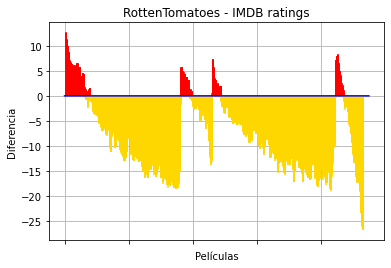

In [10]:
y=rt.mean()-imdb.mean()
fig, ax = plt.subplots()
plt.vlines(range(0,rt.mean().size),ymin=0,ymax=y,color=np.where(y>=0,'red','gold'))
plt.plot(df_nanless.index, np.zeros(len(df_nanless.index)), 'b-')
plt.xlabel('Películas')
plt.ylabel('Diferencia')
plt.title('RottenTomatoes - IMDB ratings')
plt.grid(True)
ax.set_xticklabels([])
plt.show()

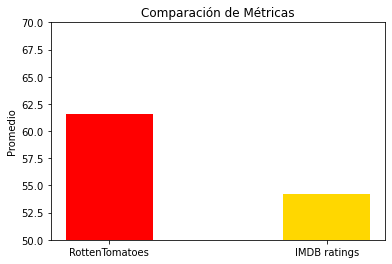

In [11]:
fig, ax = plt.subplots()
plt.bar([0,.5],[df_nanless.imdb_rating.mean(),df_nanless.rt_rating.mean()],width=.2,align='center',
        tick_label=['RottenTomatoes', 'IMDB ratings'],color=['red','gold'])
#plt.xlabel('')
plt.ylabel('Promedio')
plt.title('Comparación de Métricas')
plt.ylim(50,70)
#plt.grid(True)
#ax.set_xticklabels(['IMDB','RottenTomatoes'])
plt.show()

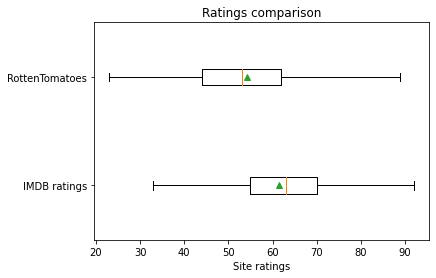

In [12]:
plt.boxplot([df_nanless.imdb_rating,df_nanless.rt_rating],vert=False,labels=['IMDB ratings','RottenTomatoes'],showfliers=False,
           showmeans=True)
plt.xlabel('Site ratings')
plt.title('Ratings comparison')
plt.show()

### Melt Streaming Services

In [13]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'ID', 'Title', 'Year',
       'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Language',
       'Runtime', 'imdb_rating', 'rt_rating'],
      dtype='object')

In [14]:
melted = df.melt(['ID','Title','Year','Age','Type','Directors','Genres','Country','Language','Runtime','imdb_rating','rt_rating'], 'Netflix', var_name='Service')

for service in ['Hulu','Disney+','Prime Video']:
    new_melted = df.melt(['ID','Title','Year','Age','Type','Directors','Genres','Country','Language','Runtime','imdb_rating','rt_rating'], service, var_name='Service')
    melted = pd.concat([melted,new_melted])
melted = melted[melted.value ==1]
melted.drop('value',inplace=True,axis=1)

### Exploded Genres

In [15]:
exploded_genres = melted.copy()
exploded_genres.Genres = exploded_genres.Genres.str.split(',')
exploded_genres = exploded_genres.explode('Genres')

In [16]:
for column in exploded_genres.columns:
    exploded_genres.rename({column:column+'_exploded'},axis=1,inplace=True)

### Exploded Countries

In [17]:
exploded_countries = melted.copy()
exploded_countries.Country = exploded_countries.Country.str.split(',')
exploded_countries = exploded_countries.explode('Country')

In [18]:
for column in exploded_countries.columns:
    exploded_countries.rename({column:column+'_exploded_countries'},axis=1,inplace=True)

### Netflix Subscribers

In [54]:
years,subs = [2013,2014,2015,2016,2017,2018,2019,2020,2021],[41.43,54.48,70.84,89.09,110.64,139.26,167.09,203.66,214.00]
netflix_by_year = pd.DataFrame(zip(years,subs), columns=['Year','Netflix_subs'])

### Output

In [20]:
df.to_csv('Movies_database.csv')

In [21]:
df_nanless.to_csv('df_nanless.csv')
melted.to_csv('melted.csv')

In [22]:
rolling_diff_wdw_50 = pd.DataFrame(y).dropna().rename({0:'RollingAverageDifference'},axis=1).reset_index()
rolling_diff_wdw_50.to_csv('rolling.csv')

In [23]:
exploded_genres.to_csv('exploded_genres.csv')

In [24]:
exploded_countries.to_csv('exploded_countries.csv')

In [55]:
netflix_by_year.to_csv('netflix_by_year.csv')

In [59]:
df_nanless.imdb_rating.median()

63.0

In [58]:
df_nanless.rt_rating.median()

53.0

In [62]:
exploded_genres.Genres_exploded.value_counts()

Drama          4326
Comedy         3525
Thriller       1957
Romance        1691
Action         1637
Family         1421
Adventure      1246
Documentary    1181
Crime          1160
Fantasy         884
Horror          865
Animation       756
Mystery         751
Sci-Fi          714
Biography       494
Music           400
History         356
Short           334
Sport           320
Musical         316
War             258
Western         233
Film-Noir        25
Talk-Show        20
Reality-TV       18
News             15
Game-Show         4
Name: Genres_exploded, dtype: int64